In [96]:
import os, sklearn, math
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from joblib import dump, load

tf.random.set_seed(42)

data = '231023_0943_2kPa_Radial_Data'
dataname = data+'_B3'
filename = 'myData/'+data+'.csv'
SD1 = pd.read_csv(filename)
SD1=SD1.iloc[:,:28]
SensorData1 = SD1

In [97]:
SD1.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx26,Sx27,Sx30,Sx31,Sx32,Sx33,Force,z,theta,r
count,5040.00000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,...,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.0,5040.000000,5040.000000
mean,52.70246,48.872341,50.048175,55.010675,83.920536,48.785317,58.408869,48.056746,47.770317,44.716687,...,42.820496,51.088909,49.541746,43.742143,65.815734,52.853810,46.793613,0.0,8.500000,3.200000
std,1.75297,13.517676,23.240662,23.093758,1.562032,37.054755,13.445018,34.552922,13.490271,13.591125,...,19.130896,1.367626,1.621991,13.601260,1.721163,1.866238,32.218446,0.0,5.188642,1.600159
min,43.50000,42.000000,41.900000,49.300000,80.100000,42.900000,50.000000,41.400000,41.600000,36.900000,...,35.500000,45.000000,45.700000,37.300000,56.000000,43.000000,-455.760000,0.0,0.000000,0.800000
25%,52.20000,47.600000,48.400000,53.400000,82.800000,45.900000,56.800000,45.200000,46.700000,43.500000,...,41.400000,50.300000,48.600000,42.400000,65.000000,51.900000,16.895000,0.0,4.000000,1.600000
50%,52.90000,48.700000,49.400000,54.400000,83.700000,46.900000,58.200000,46.500000,47.600000,44.500000,...,42.500000,51.100000,49.400000,43.500000,65.900000,53.000000,43.985000,0.0,8.500000,3.200000
75%,53.70000,49.800000,50.400000,55.500000,84.900000,48.000000,59.800000,47.600000,48.500000,45.600000,...,43.600000,51.900000,50.400000,44.500000,66.800000,54.000000,72.172500,0.0,13.000000,4.800000
max,56.80000,999.000000,999.000000,999.000000,90.300000,1403.700000,999.000000,1402.600000,999.000000,999.000000,...,999.000000,55.200000,84.900000,999.000000,70.900000,58.300000,117.130000,0.0,17.000000,5.600000


In [98]:
SDreal = SD1
SDreal["theta"] *= 20

In [99]:
SDreal.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx26,Sx27,Sx30,Sx31,Sx32,Sx33,Force,z,theta,r
count,5040.00000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,...,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.000000,5040.0,5040.000000,5040.000000
mean,52.70246,48.872341,50.048175,55.010675,83.920536,48.785317,58.408869,48.056746,47.770317,44.716687,...,42.820496,51.088909,49.541746,43.742143,65.815734,52.853810,46.793613,0.0,170.000000,3.200000
std,1.75297,13.517676,23.240662,23.093758,1.562032,37.054755,13.445018,34.552922,13.490271,13.591125,...,19.130896,1.367626,1.621991,13.601260,1.721163,1.866238,32.218446,0.0,103.772845,1.600159
min,43.50000,42.000000,41.900000,49.300000,80.100000,42.900000,50.000000,41.400000,41.600000,36.900000,...,35.500000,45.000000,45.700000,37.300000,56.000000,43.000000,-455.760000,0.0,0.000000,0.800000
25%,52.20000,47.600000,48.400000,53.400000,82.800000,45.900000,56.800000,45.200000,46.700000,43.500000,...,41.400000,50.300000,48.600000,42.400000,65.000000,51.900000,16.895000,0.0,80.000000,1.600000
50%,52.90000,48.700000,49.400000,54.400000,83.700000,46.900000,58.200000,46.500000,47.600000,44.500000,...,42.500000,51.100000,49.400000,43.500000,65.900000,53.000000,43.985000,0.0,170.000000,3.200000
75%,53.70000,49.800000,50.400000,55.500000,84.900000,48.000000,59.800000,47.600000,48.500000,45.600000,...,43.600000,51.900000,50.400000,44.500000,66.800000,54.000000,72.172500,0.0,260.000000,4.800000
max,56.80000,999.000000,999.000000,999.000000,90.300000,1403.700000,999.000000,1402.600000,999.000000,999.000000,...,999.000000,55.200000,84.900000,999.000000,70.900000,58.300000,117.130000,0.0,340.000000,5.600000


In [100]:
# SDreal 값이 999이거나 100이상인 이상치 제거
SDreal = SDreal[~(SDreal == 999).any(axis=1)]

# SDreal에서 결측값 제거
SDreal = SDreal[~SDreal.isna().any(axis=1)]

# 'Force', 'theta', 'z', 'r' 열을 제외한 열에서 100 이상의 값을 제거
cols_to_exclude = ["Force", "theta", "z", "r"]
cols_to_check = [col for col in SDreal.columns if col not in cols_to_exclude]

SDreal = SDreal[~((SDreal <= 0) & (SDreal.columns == "Force")).any(axis=1)]

SDreal = SDreal[SDreal["r"] >= 0.8*1]
SDreal = SDreal[SDreal["z"] <= 160]
SDreal = SDreal[SDreal["z"] >= 0]

import numpy as np
toRad = np.pi/180.0
SDreal['cos']=np.cos(SDreal['theta']*toRad)
SDreal['sin']=np.sin(SDreal['theta']*toRad)
SDreal.describe()


,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx30,Sx31,Sx32,Sx33,Force,z,theta,r,cos,sin
count,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,...,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.0,5019.000000,5019.000000,5019.000000,5.019000e+03
mean,52.701116,48.681530,49.480474,54.447798,83.919406,48.603048,58.219287,48.063957,47.580634,44.528492,...,49.542220,43.555688,65.817972,52.853816,46.867432,0.0,170.017932,3.198884,-0.000281,3.450988e-04
std,1.752605,1.882192,1.920895,1.573307,1.560463,34.623876,2.273137,34.624816,1.544167,1.989350,...,1.623157,1.968061,1.720321,1.867825,31.443546,0.0,103.745229,1.600438,0.706871,7.074834e-01
min,43.500000,42.000000,41.900000,49.300000,80.100000,42.900000,50.000000,41.400000,41.600000,36.900000,...,45.700000,37.300000,56.000000,43.000000,7.020000,0.0,0.000000,0.800000,-1.000000,-9.848078e-01
25%,52.200000,47.600000,48.400000,53.400000,82.800000,45.900000,56.800000,45.200000,46.700000,43.500000,...,48.600000,42.400000,65.000000,51.900000,16.880000,0.0,80.000000,1.600000,-0.766044,-6.427876e-01
50%,52.900000,48.700000,49.400000,54.400000,83.700000,46.900000,58.200000,46.500000,47.600000,44.500000,...,49.400000,43.500000,65.900000,53.000000,43.950000,0.0,160.000000,3.200000,-0.173648,1.224647e-16
75%,53.700000,49.800000,50.300000,55.500000,84.900000,48.000000,59.800000,47.600000,48.500000,45.500000,...,50.400000,44.500000,66.800000,54.000000,72.100000,0.0,260.000000,4.800000,0.766044,6.427876e-01
max,56.800000,55.100000,56.300000,59.600000,90.300000,1403.700000,91.500000,1402.600000,52.900000,82.100000,...,84.900000,78.300000,70.900000,58.300000,117.130000,0.0,340.000000,5.600000,1.000000,9.848078e-01


In [101]:
def apply_transformation(df, columns, transformation):
    # columns가 제공되지 않았다면 df의 모든 칼럼을 대상으로 함
    if columns is None:
        columns = df.columns

    for column in columns:
        df[column] = transformation(df[column])
    
    return df

def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

def standardize(column):
    return (column - column.mean()) / column.std()

def submean(column):
    return (column - column.mean())
def normalize_to_neg1_to_1(column):
    normalized = (column - column.min()) / (column.max() - column.min())  # Min-Max normalization (0 to 1)
    return (normalized - 0.5) * 2  # Transform to -1 to 1



SDreal = apply_transformation(SDreal.copy(), ['r', 'Force', 'z'], normalize_to_neg1_to_1)
#SDreal = apply_transformation(SDreal.copy(), ['Sx00','Sx01','Sx02','Sx03','Sx04','Sx05','Sx06','Sx07'], submean)

#SDreal = apply_transformation(SDreal.copy(), ['r', 'Force', 'z'], submean)
#SDreal = apply_transformation(SDreal.copy(), ['Sx00','Sx01','Sx02','Sx03','Sx04','Sx05','Sx06','Sx07'], standardize)

SDreal

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx30,Sx31,Sx32,Sx33,Force,z,theta,r,cos,sin
0,56.2,50.4,49.0,52.1,88.2,44.7,57.0,48.2,47.0,43.9,...,49.7,43.2,65.5,53.9,-0.975842,NaN,0,-1.0,1.000000,0.00000
1,55.8,50.6,49.2,52.2,88.2,44.3,56.8,48.0,46.8,43.9,...,49.4,43.0,65.6,53.9,-0.976206,NaN,0,-1.0,1.000000,0.00000
2,56.2,50.5,49.0,52.0,88.3,44.9,57.2,48.3,47.0,44.4,...,49.3,42.9,66.1,54.0,-0.974026,NaN,0,-1.0,1.000000,0.00000
3,56.2,50.4,49.3,52.0,88.4,45.1,57.0,47.6,46.3,44.2,...,49.1,42.7,65.8,54.3,-0.976751,NaN,0,-1.0,1.000000,0.00000
4,55.8,50.2,48.9,52.4,88.5,45.4,57.3,47.7,46.5,44.5,...,48.9,42.3,65.7,54.1,-0.976024,NaN,0,-1.0,1.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,53.4,47.9,48.9,54.4,85.6,47.7,53.4,45.8,45.0,42.9,...,50.2,45.4,66.8,53.3,0.168286,NaN,340,1.0,0.939693,-0.34202
5036,53.7,47.4,49.3,55.0,85.6,47.2,53.5,46.0,44.3,42.8,...,50.5,45.5,67.0,53.7,0.167741,NaN,340,1.0,0.939693,-0.34202
5037,53.7,48.0,49.2,55.2,85.0,47.2,53.3,46.3,44.6,42.5,...,50.7,45.6,67.0,52.9,0.168105,NaN,340,1.0,0.939693,-0.34202
5038,53.6,48.0,49.3,55.5,85.2,47.5,53.2,46.2,44.3,42.4,...,50.8,45.7,67.5,53.0,0.167378,NaN,340,1.0,0.939693,-0.34202


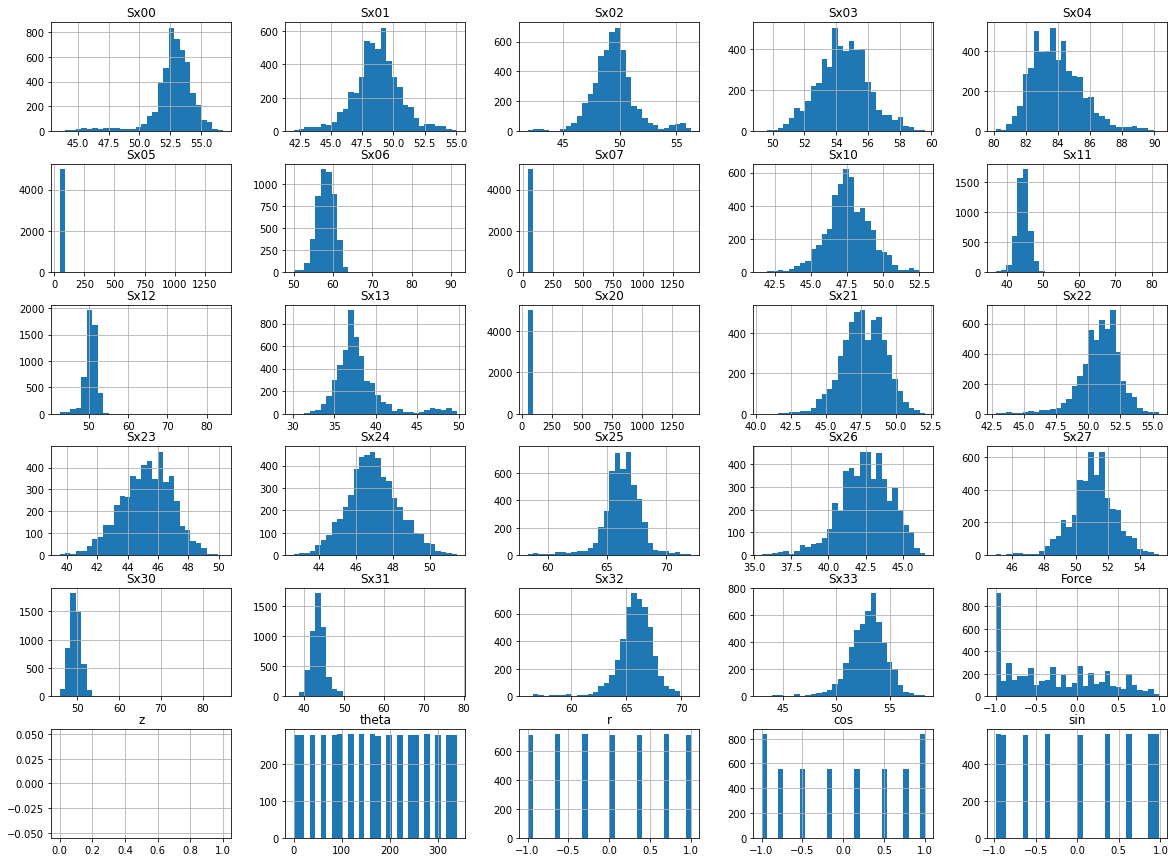

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
SDreal.hist(bins=30, figsize=(20,15))
plt.show()

In [103]:
SDy = SDreal.iloc[:,24:30]
SDy.describe()

,Force,z,theta,r,cos,sin
count,5019.000000,0.0,5019.000000,5.019000e+03,5019.000000,5.019000e+03
mean,-0.276225,NaN,170.017932,-4.649000e-04,-0.000281,3.450988e-04
std,0.571130,NaN,103.745229,6.668492e-01,0.706871,7.074834e-01
min,-1.000000,NaN,0.000000,-1.000000e+00,-1.000000,-9.848078e-01
25%,-0.820906,NaN,80.000000,-6.666667e-01,-0.766044,-6.427876e-01
50%,-0.329216,NaN,160.000000,2.220446e-16,-0.173648,1.224647e-16
75%,0.182091,NaN,260.000000,6.666667e-01,0.766044,6.427876e-01
max,1.000000,NaN,340.000000,1.000000e+00,1.000000,9.848078e-01


In [105]:
#X = SDreal.iloc[:,0:24]
#X = SDreal.iloc[:, 0:24:2]
X = SDreal.iloc[:, 0:24:3]
y = SDreal.iloc[:,[24,28,29]]

In [106]:
X

,Sx00,Sx03,Sx06,Sx11,Sx20,Sx23,Sx26,Sx31
0,56.2,52.1,57.0,43.9,50.5,40.9,41.9,43.2
1,55.8,52.2,56.8,43.9,50.7,40.6,41.5,43.0
2,56.2,52.0,57.2,44.4,50.9,41.3,41.5,42.9
3,56.2,52.0,57.0,44.2,51.1,41.9,41.2,42.7
4,55.8,52.4,57.3,44.5,50.4,41.6,41.2,42.3
...,...,...,...,...,...,...,...,...
5035,53.4,54.4,53.4,42.9,53.5,45.7,44.1,45.4
5036,53.7,55.0,53.5,42.8,53.1,45.3,43.8,45.5
5037,53.7,55.2,53.3,42.5,52.6,44.9,43.5,45.6
5038,53.6,55.5,53.2,42.4,52.5,44.9,42.6,45.7


In [107]:
y

,Force,cos,sin
0,-0.975842,1.000000,0.00000
1,-0.976206,1.000000,0.00000
2,-0.974026,1.000000,0.00000
3,-0.976751,1.000000,0.00000
4,-0.976024,1.000000,0.00000
...,...,...,...
5035,0.168286,0.939693,-0.34202
5036,0.167741,0.939693,-0.34202
5037,0.168105,0.939693,-0.34202
5038,0.167378,0.939693,-0.34202


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.25, random_state=42)

In [109]:
X_sum = len(X_train)+len(X_valid)+len(X_test)
X_train_per = int(len(X_train)/X_sum*100)
X_valid_per = int(len(X_valid)/X_sum*100)
X_test_per = int(len(X_test)/X_sum*100)

print('X_train: ',len(X_train),'ea',X_train_per,'%   ', 
      'X_valid: ',len(X_valid),'ea',X_valid_per,'%   ',
      'X_test: ',len(X_test),'ea',X_test_per,'%',)

X_train:  3011 ea 59 %    X_valid:  1004 ea 20 %    X_test:  1004 ea 20 %


In [110]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [111]:
import pickle
from joblib import dump, load

file_name = 'myScaler/'+dataname+'_SS.pkl'
dump(scaler, file_name)

['myScaler/231023_0943_2kPa_Radial_Data_B3_SS.pkl']

In [112]:
from tensorflow import keras
model = keras.models.Sequential([  
    keras.layers.Dense(128, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),            
    keras.layers.Dense(128, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),                                                
    keras.layers.Dense(3)    
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.RMSprop(learning_rate=1e-3, rho=0.9))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               1152      
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 32)                4128      
                                                                 
 dense_23 (Dense)            (None, 32)                1056      
                                                                 
 dense_24 (Dense)            (None, 3)                 99        
                                                                 
Total params: 22,947
Trainable params: 22,947
Non-trainable params: 0
_________________________________________________________________


## Callback (best, early stopping, tensorboard)

In [113]:
import os 
#root_logdir = os.path.join(os.curdir, 'mylog/'+data)
root_logdir = os.path.join(os.curdir, 'mylog/'+'231006_Data')

def get_run_logdir():
    import time
    run_id= time.strftime("%m%d_%Hh%Mm%Ss"+dataname)
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [114]:
K = keras.backend
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [115]:
dataname

'231023_0943_2kPa_Radial_Data_B3'

In [116]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
n_epochs = 300
batch_size = 8
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle,early_stopping_cb,tensorboard_cb])
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:5]
y_pred = model.predict(X_new)

Epoch 1/300
95/95 [==============================] - 1s 4ms/step - loss: 0.4088 - val_loss: 0.3449
Epoch 2/300
95/95 [==============================] - 0s 2ms/step - loss: 0.3074 - val_loss: 0.3457
Epoch 3/300
95/95 [==============================] - 0s 5ms/step - loss: 0.2251 - val_loss: 0.3326
Epoch 4/300
95/95 [==============================] - 0s 2ms/step - loss: 0.1976 - val_loss: 0.2352
Epoch 5/300
95/95 [==============================] - 0s 2ms/step - loss: 0.1741 - val_loss: 0.1962
Epoch 6/300
95/95 [==============================] - 0s 2ms/step - loss: 0.1549 - val_loss: 0.2532
Epoch 7/300
95/95 [==============================] - 0s 2ms/step - loss: 0.1460 - val_loss: 0.2312
Epoch 8/300
95/95 [==============================] - 0s 2ms/step - loss: 0.1308 - val_loss: 0.1662
Epoch 9/300
95/95 [==============================] - 0s 2ms/step - loss: 0.1195 - val_loss: 0.1758
Epoch 10/300
95/95 [==============================] - 0s 2ms/step - loss: 0.1082 - val_loss: 0.1461
Epoch 11/

In [117]:
# %load_ext tensorboard
# %tensorboard --logdir=./mylog/230320_Data --port=2322

In [118]:
model.save('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/TACTS/TACTS_v3/myModel/'+dataname+'.h5')

In [119]:
model = tf.keras.models.load_model('myModel/'+dataname+'.h5')
scaler = load(file_name)
valid_predictions = model.predict(X_valid)

valid_predictions_df=pd.DataFrame(valid_predictions)
#valid_predictions_df.columns = ["valid_force","valid_z"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_r"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_cos","valid_sin"]
valid_predictions_df.columns = ["valid_force","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_r","valid_cos","valid_sin"]
valid_theta_rad = np.arctan2(valid_predictions_df['valid_sin'], valid_predictions_df['valid_cos'])
valid_theta_deg = np.degrees(valid_theta_rad)
valid_predictions_df['valid_theta'] = valid_theta_deg
valid_predictions_df['valid_theta'] /= 180
valid_predictions_df

32/32 [==============================] - 0s 645us/step


,valid_force,valid_cos,valid_sin,valid_theta
0,-0.630167,0.184595,0.970105,0.440147
1,-0.609051,0.229190,0.900410,0.420662
2,-0.938931,-0.045404,1.067219,0.513534
3,-1.045713,-0.310847,0.910368,0.604736
4,-0.817470,0.216780,0.631938,0.394811
...,...,...,...,...
999,0.644911,-0.893811,-0.029372,-0.989544
1000,-0.325800,-0.664706,-0.733134,-0.734430
1001,-0.610491,-0.647006,-0.990339,-0.684207
1002,0.101968,-0.521005,-0.954791,-0.659001


In [120]:
k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
#k_df.columns  = ["force","z","cos","sin"]
k_df.columns  = ["force","cos","sin"]
#k_df.columns  = ["force","z","r","cos","sin"]
theta_rad = np.arctan2(k_df['sin'], k_df['cos'])
theta_deg = np.degrees(theta_rad)
k_df['theta'] = theta_deg
k_df['theta'] /= 180
k_df

,force,cos,sin,theta
0,-0.606394,0.173648,0.984808,0.444444
1,-0.282354,0.173648,0.984808,0.444444
2,-0.980202,0.173648,0.984808,0.444444
3,-0.997275,-0.173648,0.984808,0.555556
4,-0.820361,0.173648,0.984808,0.444444
...,...,...,...,...
999,0.787304,-0.939693,0.342020,0.888889
1000,0.039688,-0.173648,-0.984808,-0.555556
1001,-0.386977,-0.500000,-0.866025,-0.666667
1002,0.197348,-0.500000,-0.866025,-0.666667


In [121]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
n = k_df.shape[1]
for i in range(0,n):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr_matrix = pd.DataFrame(index=k_df.columns, columns=valid_predictions_df.columns)

# 각 열과 행의 상관관계 계산
for k_col in k_df.columns:
    for valid_col in valid_predictions_df.columns:
        corr2 = np.corrcoef(k_df[k_col], valid_predictions_df[valid_col])[0, 1]
        corr_matrix.loc[k_col, valid_col] = corr2
corr_matrix

corr
86.93% force
93.21% cos
93.41% sin
67.37% theta


,valid_force,valid_cos,valid_sin,valid_theta
force,0.869317,-0.301661,0.028259,-0.07866
cos,-0.262286,0.932142,-0.00062,0.047506
sin,0.070776,-0.024583,0.934057,0.745677
theta,0.062949,-0.139281,0.713158,0.673727


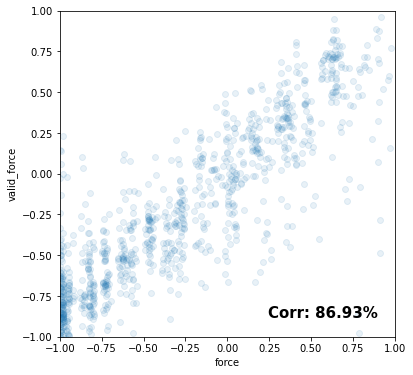

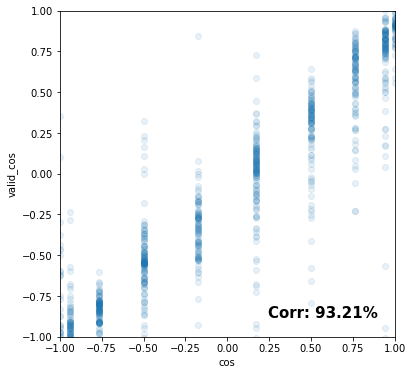

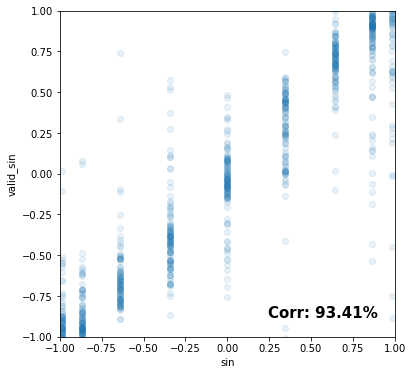

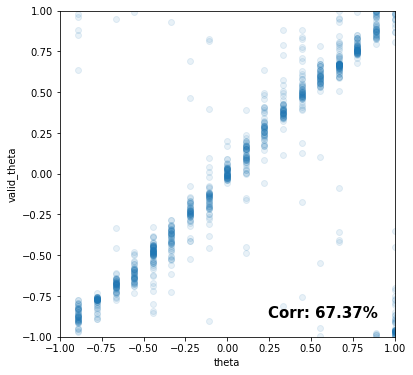

In [122]:
import pandas as pd
import os
import matplotlib.pyplot as plt

alpa = 0.1
output_dir = "myLearningData/savefig/1line"  # 저장할 폴더 이름

# 폴더가 없는 경우 폴더를 생성합니다.
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#fields = ['force','z','cos','sin','theta']
fields = ['force','cos','sin','theta']
#fields = ['force','z','r','cos','sin','theta']

for field in fields:
    plt.figure(figsize=(6, 6))  # Set the figure size to 1:1
    plt.scatter(ValidPre[field], ValidPre[f"valid_{field}"], alpha=alpa)
    plt.xlabel(field)
    plt.ylabel(f"valid_{field}")
    plt.xlim(-1, 1)  # x축 범위 설정
    plt.ylim(-1, 1)  # y축 범위 설정

    # Compute the correlation value to be added
    corr_value = format(corr[f"valid_{field}"][field]*100,'.2f') + '%'
    plt.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom', 
             transform=plt.gca().transAxes, fontsize=15, weight='bold')

    plt.savefig(os.path.join(output_dir, f"{dataname}_{field}.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장
    plt.show()


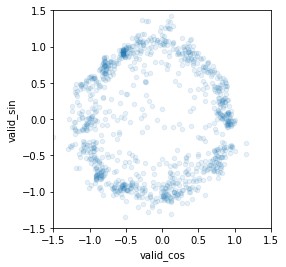

In [123]:
alpa = 0.1  # assuming you've set alpha to this value, adjust as needed
ax = ValidPre.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpa)

# Set the aspect ratio to be equal
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

# Display the plot
plt.show()

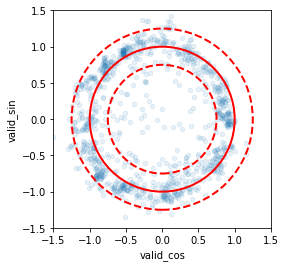

In [124]:
alpha = 0.1  # set alpha value for scatter plot
ax = ValidPre.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)

# Draw a circle with center at (0, 0) and radius 1
circle = plt.Circle((0, 0), 1, color='r', fill=False, linewidth=2)
ax.add_artist(circle)

# Draw offset circles (one inside and one outside the main circle)
offset = 0.25  # adjust the offset value as needed
inner_circle = plt.Circle((0, 0), 1 - offset, color='r', linestyle='--', fill=False, linewidth=2)
outer_circle = plt.Circle((0, 0), 1 + offset, color='r', linestyle='--', fill=False, linewidth=2)
ax.add_artist(inner_circle)
ax.add_artist(outer_circle)

# Set the aspect ratio to be equal
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
# Display the plot
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_offset.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

plt.show()


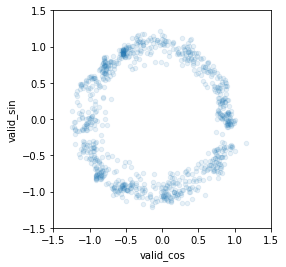

13.147410358565736

In [125]:
ValidPre_filtered = ValidPre[
    (ValidPre['valid_cos']**2 + ValidPre['valid_sin']**2 <= (1 + offset)**2) &
    (ValidPre['valid_cos']**2 + ValidPre['valid_sin']**2 >= (1 - offset)**2)
]


ax = ValidPre_filtered.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_cut.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장

plt.show()

total_data_count = len(ValidPre)
filtered_data_count = len(ValidPre_filtered)
percentage_filtered_out = ((total_data_count - filtered_data_count) / total_data_count) * 100
percentage_filtered_out

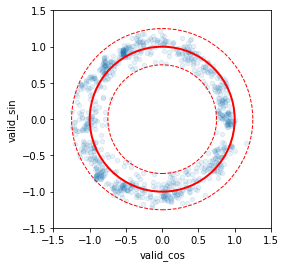

In [126]:
# 기존의 scatter plot을 그립니다.
ax = ValidPre_filtered.plot(kind="scatter", x="valid_cos", y="valid_sin", alpha=alpha)

# 중심이 (0, 0)이고 반지름이 1인 실선 원을 추가합니다.
circle = plt.Circle((0, 0), 1, color='r', fill=False, linewidth=2)
ax.add_artist(circle)

# 점선 원을 추가합니다. 하나는 내부에, 하나는 외부에 위치합니다.
offset = 0.25  # offset 값을 필요에 따라 조정합니다.
inner_circle = plt.Circle((0, 0), 1 - offset, color='r', linestyle='--', fill=False, linewidth=1)
outer_circle = plt.Circle((0, 0), 1 + offset, color='r', linestyle='--', fill=False, linewidth=1)
ax.add_artist(inner_circle)
ax.add_artist(outer_circle)

# 그래프의 비율을 1:1로 설정합니다.
ax.set_aspect('equal', 'box')
plt.xlim(-1.5, 1.5)  # x축 범위 설정
plt.ylim(-1.5, 1.5)  # y축 범위 설정

# 그래프를 파일로 저장합니다.
plt.savefig(os.path.join(output_dir, f"{dataname}_Circle_cut_offset.png"))

# 그래프를 출력합니다.
plt.show()
